# From Biological to Artificial Neurons

## The Perceptron

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris(as_frame=True)
X=iris.data[["petal length (cm)", "petal width (cm)"]].values
y=(iris.target==0) #Iris Setosa

per_clf=Perceptron(random_state=42)
per_clf.fit(X,y)

X_new=np.array([[1,3],[2,0.4]])
y_pred=per_clf.predict(X_new)
y_pred

array([False,  True])

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(loss="perceptron",penalty=None,learning_rate="constant",eta0=1,random_state=42)
sgd_clf.fit(X,y)
assert (sgd_clf.coef_==per_clf.coef_).all()
assert (sgd_clf.intercept_==per_clf.intercept_).all()

## Regression MLPs

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

housing=fetch_california_housing()
X_train_full,X_test,y_full_train,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_full_train,random_state=42)


mlp_reg=MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
model=make_pipeline(StandardScaler(),mlp_reg)
model.fit(X_train,y_train)
y_pred=model.predict(X_valid)
rmse=root_mean_squared_error(y_valid,y_pred)

In [8]:
rmse

0.5053326657968762

## Classification MLPs

In [10]:
from sklearn.neural_network import MLPClassifier

X_train_full,X_test,y_full_train,y_test=train_test_split(iris.data,iris.target,test_size=0.1,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_full_train,test_size=0.1,random_state=42)

mlp_clf=MLPClassifier(hidden_layer_sizes=[5],max_iter=10000,random_state=42)
model=make_pipeline(StandardScaler(),mlp_clf)
model.fit(X_train,y_train)
accuracy=model.score(X_valid,y_valid)
accuracy


1.0

# Implementing MLPs with Keras

## Building an Image Classifier Using the Sequential API

In [13]:
import tensorflow as tf

fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist

X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

In [14]:
X_train.shape

(55000, 28, 28)

In [15]:
X_train.dtype

dtype('uint8')

In [16]:
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

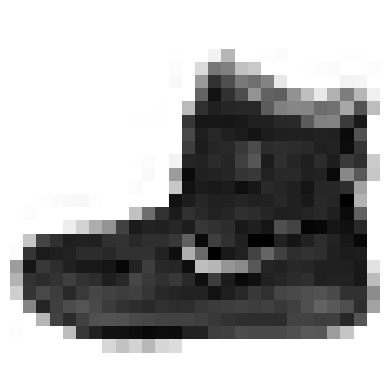

In [17]:
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()

In [18]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

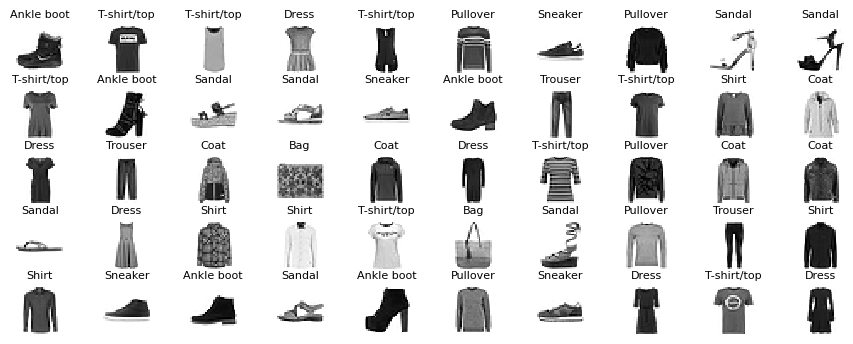

In [20]:
plt.figure(figsize=(11,4))
for idx,image_data in enumerate(X_train[:50]):
    plt.subplot(5,10,idx+1)
    plt.imshow(X_train[idx],cmap="binary",interpolation="nearest")
    plt.title(class_names[y_train[idx]],fontsize=8)
    plt.axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

### Creating the model using Sequential API

In [22]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

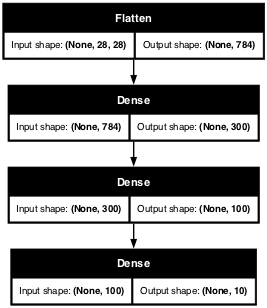

In [26]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=50)

In [27]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [28]:
hidden1=model.layers[1]

In [29]:
model.get_layer('dense') is hidden1

True

In [30]:
weights,biases=hidden1.get_weights()

In [31]:
weights

array([[-0.05320494,  0.06161481,  0.05378279, ..., -0.01089982,
        -0.02689167,  0.03936088],
       [ 0.05599104, -0.00854814, -0.02893335, ...,  0.02316009,
         0.0062698 ,  0.02482408],
       [-0.00518212,  0.00206188, -0.06834348, ...,  0.04720513,
         0.0047854 , -0.06781816],
       ...,
       [ 0.04113103,  0.01260929,  0.05572934, ...,  0.05263579,
        -0.05914831,  0.01378481],
       [ 0.04981639,  0.04887978,  0.07132876, ...,  0.04719461,
        -0.00607397,  0.0628069 ],
       [-0.04692319,  0.00426484, -0.05412834, ...,  0.02259324,
         0.03357611,  0.0278805 ]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

#### Compiling the Model

In [36]:
model.compile(loss="sparse_categorial_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])


In [37]:
#this cell is equivalent to above cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
             optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy]
             )

In [38]:
tf.keras.utils.to_categorical([2,5,6,3],num_classes=10)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [39]:
np.argmax([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],
        axis=1)

array([2, 5, 6, 3])

#### Training and evaluating the model

In [41]:
history=model.fit(X_train,y_train,epochs=30,
                 validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 860us/step - loss: 0.9828 - sparse_categorical_accuracy: 0.6853 - val_loss: 0.5152 - val_sparse_categorical_accuracy: 0.8250
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - loss: 0.5109 - sparse_categorical_accuracy: 0.8253 - val_loss: 0.4592 - val_sparse_categorical_accuracy: 0.8356
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - loss: 0.4559 - sparse_categorical_accuracy: 0.8419 - val_loss: 0.4358 - val_sparse_categorical_accuracy: 0.8410
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - loss: 0.4251 - sparse_categorical_accuracy: 0.8523 - val_loss: 0.4204 - val_sparse_categorical_accuracy: 0.8494
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - loss: 0.4034 - sparse_categorical_accuracy: 0.8595 - val_loss: 0.4100 - val_sparse_categorical_accuracy: 0.8546
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - loss: 0.3862 - sparse_categorical_accuracy: 0.8650 - val_loss: 0.4025 - val_sparse_categoric

In [42]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [43]:
print(history.epoch) 


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [44]:
df=pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.716627,0.763855,0.515159,0.8250
1,0.491543,0.829855,0.459175,0.8356
2,0.445114,0.845073,0.435805,0.8410
3,0.417100,0.854600,0.420399,0.8494
4,0.396864,0.861364,0.410040,0.8546


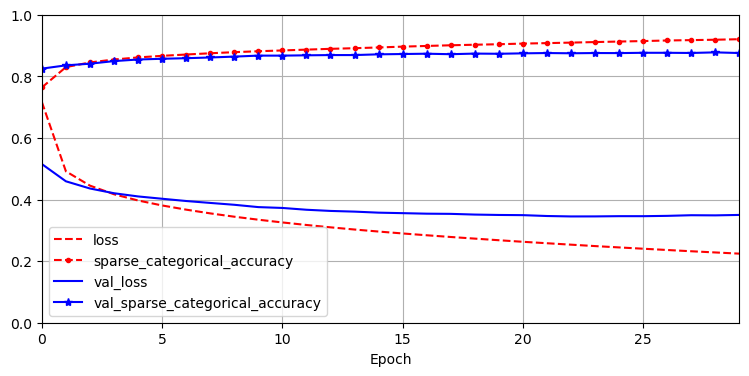

In [45]:
df.plot(figsize=(9,4),xlim=[0,29],ylim=[0,1],grid=True,xlabel="Epoch",style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [46]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.3673 - sparse_categorical_accuracy: 0.8714


[0.36738911271095276, 0.8723999857902527]

#### Using Model to make prediction

In [48]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.01, 0.  , 0.76],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [49]:
y_pred=y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [50]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [51]:
y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

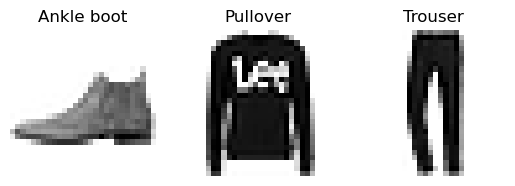

In [52]:
for idx,image in enumerate(X_new):
    plt.subplot(1,3,idx+1)
    plt.imshow(image,cmap="binary",interpolation="nearest")
    plt.title(class_names[y_test[idx]])
    plt.axis("off")
    